## 📊 Visualisations csv IMDb 🎥

🎬 Import librairies

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

🎬 Import Dataset

In [61]:
df = pd.read_csv("C:/Users/zaome/Documents/Arthuro/Projet_scraping/movies.csv")
df = df.drop('Unnamed: 0', axis=1)
df

,Films,Année,Directeur,Durée,Genre,Note,Metascore,Votes,Prix
0,The Shawshank Redemption,1994,Frank Darabont,142,Drama,9.3,80.0,2480727,28.34
1,The Godfather,1972,Francis Ford Coppola,175,"Crime, Drama",9.2,100.0,1713388,134.97
2,The Dark Knight,2008,Christopher Nolan,152,"Action, Crime, Drama",9.0,84.0,2435080,534.86
3,The Godfather: Part II,1974,Francis Ford Coppola,202,"Crime, Drama",9.0,90.0,1190161,57.30
4,12 Angry Men,1957,Sidney Lumet,96,"Crime, Drama",9.0,96.0,734230,4.36
...,...,...,...,...,...,...,...,...,...
225,Back to the Future,1985,Robert Zemeckis,116,"Adventure, Comedy, Sci-Fi",8.5,87.0,1119879,210.61
226,Once Upon a Time in the West,1968,Sergio Leone,165,Western,8.5,80.0,315851,5.32
227,Psycho,1960,Alfred Hitchcock,109,"Horror, Mystery, Thriller",8.5,97.0,634922,32.00
228,Rear Window,1954,Alfred Hitchcock,112,"Mystery, Thriller",8.5,100.0,468018,36.76


🎬 Data type

In [62]:
df.dtypes

Films         object
Année          int64
Directeur     object
Durée          int64
Genre         object
Note         float64
Metascore    float64
Votes          int64
Prix         float64
dtype: object

📊 Correlation

<AxesSubplot:>

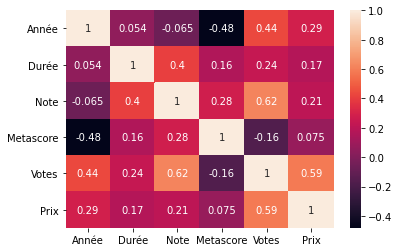

In [63]:
sns.heatmap(df.corr(),annot = True)

🎬 Films les mieux notés

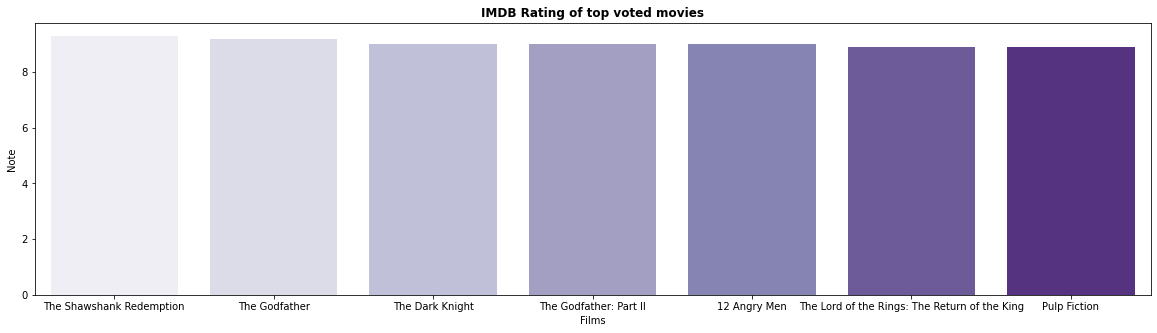

In [64]:
fig,axs = plt.subplots(figsize=(20,5))
g = sns.barplot(x = df['Films'][:7],y = df['Note'][:7], palette = 'Purples')
g.set_title("IMDB Rating of top voted movies", weight = "bold")
plt.show()

🎬 Nombre de vote des films les mieux notés

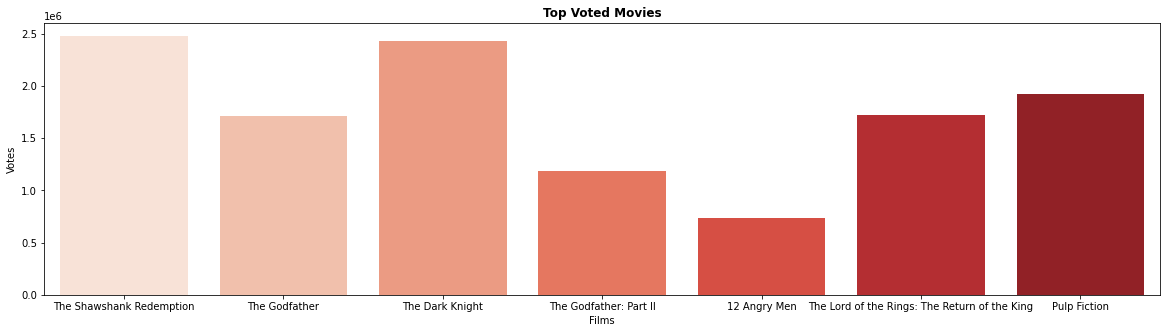

In [65]:
fig,axs = plt.subplots(figsize=(20,5))
g = sns.barplot(x = df['Films'][:7],y = df['Votes'][:7], palette = 'Reds')
g.set_title("Top Voted Movies", weight = "bold")
plt.show()

🎬 Métascore des films les mieux notés

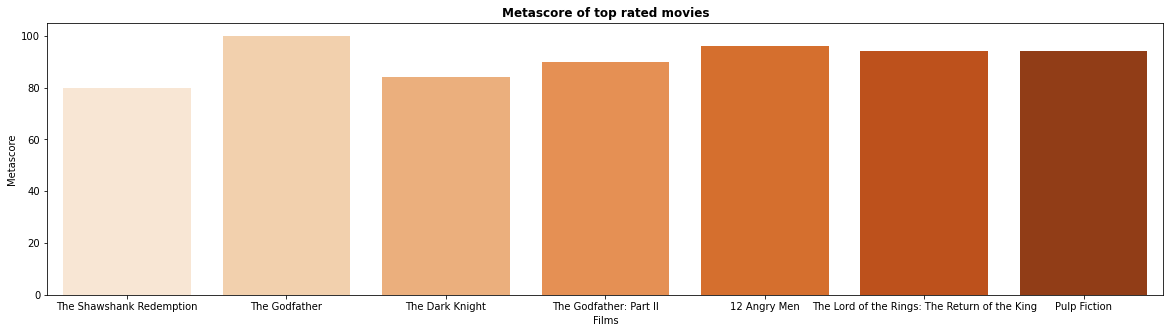

In [66]:
fig,axs = plt.subplots(figsize=(20,5))
g = sns.barplot(x = df['Films'][:7],y = df['Metascore'][:7], palette = 'Oranges')
g.set_title("Metascore of top rated movies", weight = "bold")
plt.show()

🎬 Prix des films les mieux notés

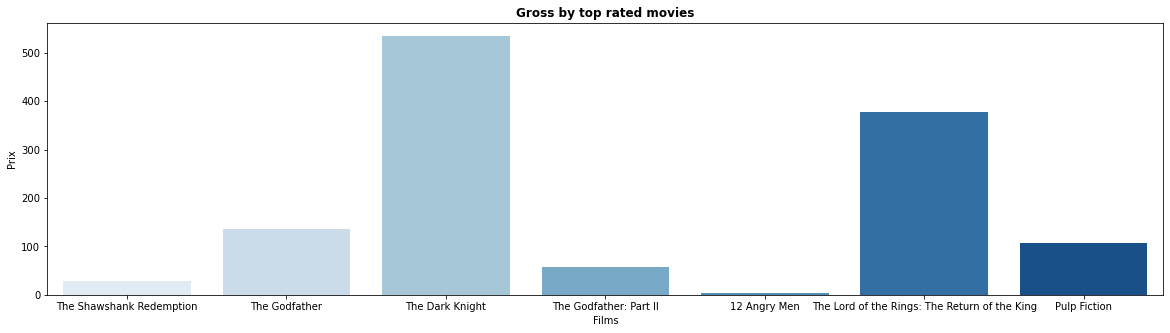

In [67]:
fig,axs=plt.subplots(figsize=(20,5))
g = sns.barplot(x = df['Films'][:7],y = df['Prix'][:7], palette = 'Blues')
g.set_title("Gross by top rated movies", weight = "bold")
plt.show()

🎬 Directeurs

In [68]:
import plotly.express as px
director = df.Directeur.value_counts()

fig = px.pie(director, 
             values = director.values, 
             names = director.index,
             color_discrete_sequence = px.colors.sequential.RdBu,
             width = 700, height = 700)
fig.update_traces(marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

🎬 Genre

C:\Users\zaome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



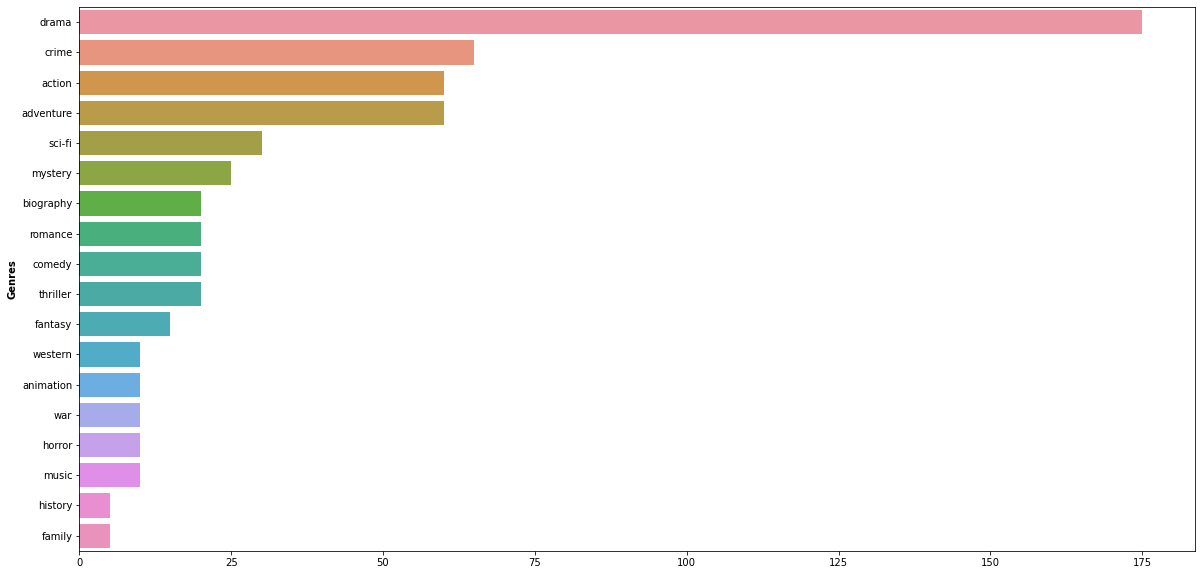

In [69]:
from collections import Counter
genre = []
for x in df['Genre']:
    for y in x.split(','):
        genre.append(y.strip().lower())

count = Counter(genre)
count = count.most_common()[:18]

x,y = map(list,zip(*count)) #?

fig,axs = plt.subplots(figsize=(20,10))
g = sns.barplot(y,x)
g.set_ylabel("Genres", weight = "bold")
plt.show()

In [70]:
df['genre'] = df['Genre'].apply(lambda text: text.split(',')[0])
df.drop(columns='Genre', inplace=True)
df['genre'].value_counts()

Action                 60
Crime                  50
Drama                  30
Biography              20
Drama                  20
Animation              10
Comedy                 10
Western                10
Adventure              10
Mystery                 5
Horror                  5
Name: genre, dtype: int64

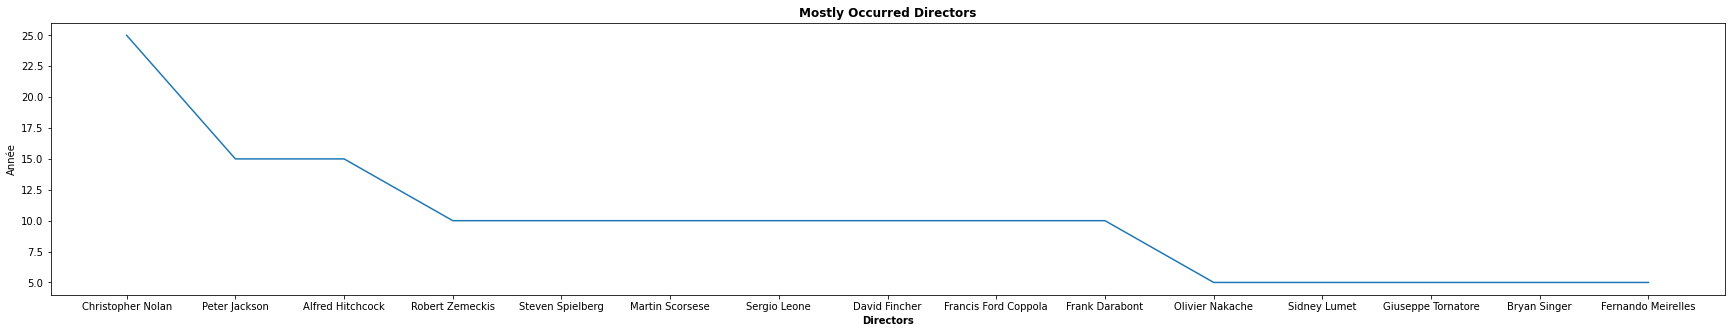

In [78]:
fig,axs = plt.subplots(figsize=(30,5))
g = sns.lineplot(x = df['Directeur'].value_counts()[:15].index,y = df['Année'].value_counts()[:15])
g.set_title("Mostly Occurred Directors", weight = "bold")
g.set_xlabel("Directors", weight = "bold")
plt.show()

🎬 Années

In [72]:
fig = px.histogram(data_frame = df.sort_values(by='Année'), x='Année')
fig.update_layout()

In [73]:
fig = px.scatter(df, x='Prix', y='Votes', hover_data=['Films'],
                color='genre')

fig.update_layout(font=dict(),
                 xaxis=dict(title='Prix'),
                 yaxis=dict(title='Nombre de votes', showgrid=False))

📊 Densités

C:\Users\zaome\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



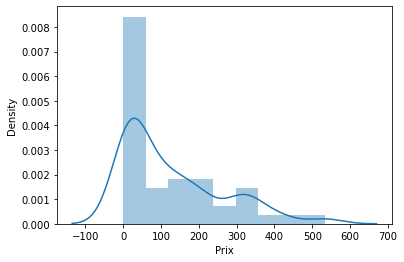

In [52]:
ax = sns.distplot(df['Prix'])

C:\Users\zaome\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



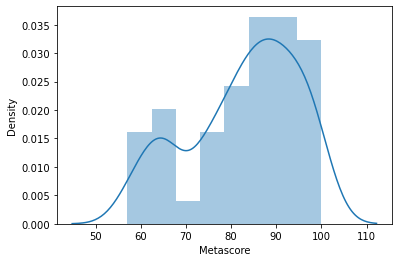

In [53]:
ax = sns.distplot(df['Metascore'])

C:\Users\zaome\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



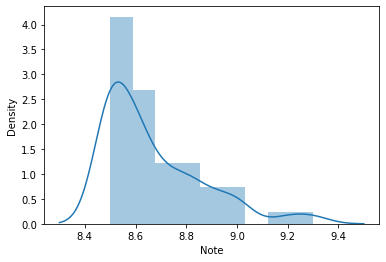

In [56]:
ax = sns.distplot(df['Note'])